In [84]:
%pip install numpy
%pip install pandas 
%pip install scikit-learn
%pip install xgboost
%pip install lightgbm
%pip install imblearn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import plot_importance
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [86]:
df1=pd.read_csv('data2.csv')

In [87]:
df2=df1.replace(to_replace='f',value=1)

In [88]:
df=df2.replace(to_replace='r',value=0)

C:\Users\reche\AppData\Local\Temp\ipykernel_9072\3168133284.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df2.replace(to_replace='r',value=0)


In [89]:
df.describe()

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
count,64576.000000,6.457600e+04,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000,64576.000000
mean,176.454937,1.184401e+03,2307.673238,57.508796,0.951654,0.283108,135.249086,0.250338,0.192925,19.222646,1.143961,0.209338,0.508365,0.031720,0.052884,0.299290,498.409769,0.500124
std,723.891343,2.182939e+04,2589.601621,64.151891,0.214498,0.450512,214.157930,0.338159,0.252839,121.720180,5.841182,0.300594,1.155888,0.219946,0.521755,0.349862,947.679203,0.500004
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.230000e+02,393.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,2.750000,0.080000,0.000000,0.000000,0.000000,0.000000,0.033173,24.892725,0.000000
50%,29.000000,3.380000e+02,994.000000,32.000000,1.000000,0.000000,46.000000,0.055556,0.057000,9.500000,0.440000,0.000000,0.071000,0.000000,0.000000,0.136608,184.293732,1.000000
75%,124.000000,8.160000e+02,3600.000000,110.000000,1.000000,1.000000,168.000000,0.444444,0.333000,18.730000,1.040000,0.333000,0.611000,0.000000,0.000000,0.458333,583.517700,1.000000
max,76200.000000,3.900000e+06,8800.000000,555.000000,1.000000,1.000000,3644.000000,1.000000,1.000000,26650.000000,1009.090027,1.000000,30.000000,20.000000,58.000000,1.000000,26786.134770,1.000000


In [90]:
df=df.drop(columns=['cl','cz','erl','erc','lt','cs','pi','ni'],axis=1)

In [91]:
df.drop(columns=['pic'], inplace=True)


In [92]:
df=df.fillna(value=0)

In [93]:
df = df.astype({"pos": 'int',  "flw": 'int', "flg": 'int', "bl": 'int',"lin": 'int',"class": 'int',"pr": 'int',"fo": 'int',"hc": 'int'})

In [94]:
df.describe()

,pos,flw,flg,bl,lin,hc,pr,fo,class
count,64926.000000,6.492600e+04,64926.000000,64926.000000,64926.000000,64926.000000,64926.000000,64926.000000,64926.000000
mean,175.503712,1.178017e+03,2295.233142,57.198780,0.281582,0.308243,0.009318,0.028633,0.497428
std,722.053131,2.177065e+04,2588.134226,64.117175,0.449774,1.086424,0.188027,0.502589,0.499997
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.210000e+02,386.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,3.350000e+02,986.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,122.000000,8.120000e+02,3600.000000,109.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,76200.000000,3.900000e+06,8800.000000,555.000000,1.000000,30.000000,20.000000,58.000000,1.000000


In [95]:
x=df.drop(columns=['class'])
y=df['class']

In [96]:
x.head()

,pos,flw,flg,bl,lin,hc,pr,fo
0,0,35,672,0,0,0,0,0
1,183,195,904,154,1,0,0,0
2,33,815,1900,145,0,1,0,0
3,39,1200,578,84,0,0,0,0
4,14,253,1500,40,0,0,0,0


In [97]:
x.tail()

,pos,flw,flg,bl,lin,hc,pr,fo
64921,13,145,642,0,0,0,0,0
64922,652,3000,1300,146,1,1,0,0
64923,1500,3700,3200,147,1,0,0,0
64924,329,1500,1800,218,1,0,0,0
64925,206,659,608,27,0,0,0,0


In [98]:
x.shape

(64926, 8)

In [99]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32

In [100]:
y.shape

(64926,)

In [101]:
x.shape

(64926, 8)

In [102]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [103]:
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(x_train, y_train)

In [104]:
model= XGBClassifier(n_estimators=300,  
    learning_rate=0.05,  
    max_depth=5,  
    colsample_bytree=0.7,  
    subsample=0.8,  
    random_state=42 )

In [105]:
print(y.ndim)

1


In [106]:
y.shape

(64926,)

In [107]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [108]:
y_probs = model.predict_proba(x_test)[:, 1]

In [109]:
threshold = 0.50  # Adjust based on results
y_predict = (y_probs > threshold).astype(int)

In [110]:
thresholds = [0.49, 0.50, 0.55]  # Try different values
for t in thresholds:
    y_pred_adj = (y_probs > t).astype(int)  # Convert probabilities to binary predictions

    print(f"\nThreshold: {t}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_adj))
    print("Accuracy:", accuracy_score(y_test, y_pred_adj))
    print("Precision:", precision_score(y_test, y_pred_adj))
    print("Recall:", recall_score(y_test, y_pred_adj))



Threshold: 0.49
Confusion Matrix:
[[5602  930]
 [1534 4920]]
Accuracy: 0.8102572000616048
Precision: 0.841025641025641
Recall: 0.7623179423613263

Threshold: 0.5
Confusion Matrix:
[[5645  887]
 [1577 4877]]
Accuracy: 0.8102572000616048
Precision: 0.8461138098542679
Recall: 0.7556554074992253

Threshold: 0.55
Confusion Matrix:
[[5853  679]
 [1810 4644]]
Accuracy: 0.8083320498998922
Precision: 0.8724403531842946
Recall: 0.7195537651069105


In [111]:
y_predict=model.predict(x_test)

In [112]:
print(accuracy_score(y_predict,y_test))

0.8102572000616048


In [113]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      7222
           1       0.76      0.85      0.80      5764

    accuracy                           0.81     12986
   macro avg       0.81      0.81      0.81     12986
weighted avg       0.82      0.81      0.81     12986



In [114]:
print(confusion_matrix(y_predict,y_test))

[[5645 1577]
 [ 887 4877]]


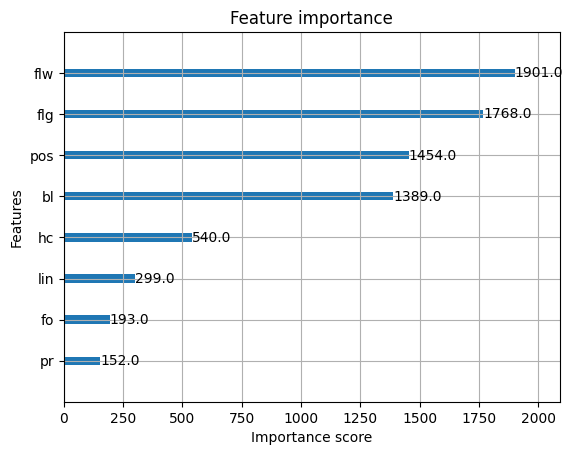

In [115]:
plot_importance(model)
plt.show()

In [116]:
correlation = df.corr()['hc'].abs().sort_values()
print(correlation)

flw      0.001619
pos      0.004250
flg      0.016958
lin      0.047902
class    0.050301
bl       0.105701
pr       0.125504
fo       0.328964
hc       1.000000
Name: hc, dtype: float64


In [117]:
print(df[['pr', 'fo']].head(10))


   pr  fo
0   0   0
1   0   0
2   0   0
3   0   0
4   0   0
5   0   0
6   0   0
7   0   0
8   0   0
9   0   0


In [121]:
%pip install pickle


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pickle


In [122]:
import pickle
filename= 'xgb.sav'
pickle.dump(model, open (filename, 'wb'))